In [119]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [120]:
from pandas.io.data import DataReader
from datetime import datetime

rub = DataReader('RUB=X',  'yahoo', datetime(2007,1,1), datetime(2016,8,30))
type(ibm)

pandas.core.frame.DataFrame

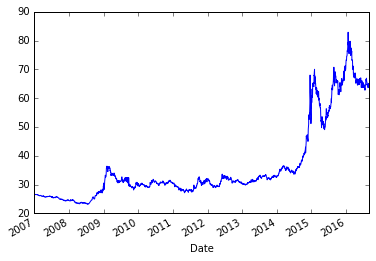

In [14]:
rub["Adj Close"].plot()

C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=150,center=False).mean()
C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=150,center=False).std()


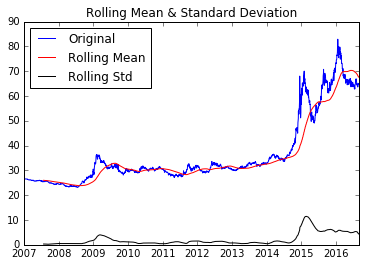

Results of Dickey-Fuller Test:
Test Statistic                   -0.582025
p-value                           0.874992
#Lags Used                       21.000000
Number of Observations Used    2470.000000
Critical Value (5%)              -2.862711
Critical Value (1%)              -3.433000
Critical Value (10%)             -2.567393
dtype: float64


In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=150)
    rolstd = pd.rolling_std(timeseries, window=150)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

test_stationarity(rub["Adj Close"])

Нулевая гипотеза о стационарности временного ряда уверенно отклоняется тестом Тест Дики — Фуллера

Попробуем востановить стационарность, наивно, но два воспользуемся двумя способами: убрать тренд и сезонность 

C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=150,center=False).mean()
C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=150,center=False).std()


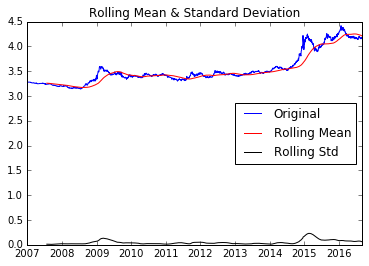

Results of Dickey-Fuller Test:
Test Statistic                   -0.369704
p-value                           0.915036
#Lags Used                       21.000000
Number of Observations Used    2470.000000
Critical Value (5%)              -2.862711
Critical Value (1%)              -3.433000
Critical Value (10%)             -2.567393
dtype: float64


In [121]:
# возьмем лог, который "penalize higher values more than smaller values"
ts_log = np.log(rub["Adj Close"])
test_stationarity(ts_log)

C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  app.launch_new_instance()


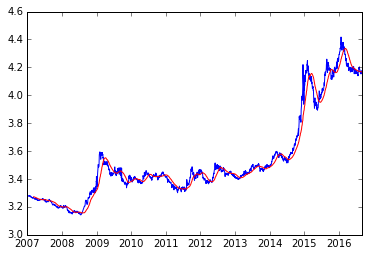

In [30]:
# далее вычтем скользящее среднее

moving_avg = pd.rolling_mean(ts_log,50)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=150,center=False).mean()
C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=150,center=False).std()


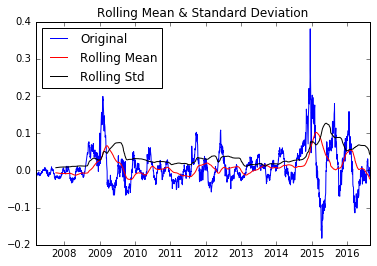

Results of Dickey-Fuller Test:
Test Statistic                -6.062545e+00
p-value                        1.202942e-07
#Lags Used                     2.100000e+01
Number of Observations Used    2.421000e+03
Critical Value (5%)           -2.862735e+00
Critical Value (1%)           -3.433054e+00
Critical Value (10%)          -2.567406e+00
dtype: float64


In [32]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=50,ignore_na=False,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


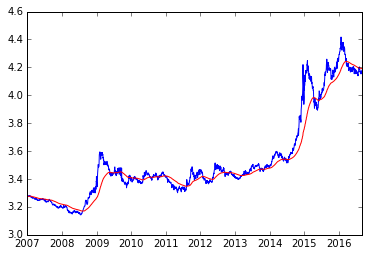

In [36]:
expwighted_avg = pd.ewma(ts_log, halflife=50)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=150,center=False).mean()
C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=150,center=False).std()


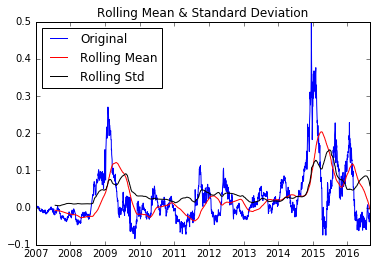

Results of Dickey-Fuller Test:
Test Statistic                   -4.094248
p-value                           0.000990
#Lags Used                       21.000000
Number of Observations Used    2470.000000
Critical Value (5%)              -2.862711
Critical Value (1%)              -3.433000
Critical Value (10%)             -2.567393
dtype: float64


In [37]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

Два способа убрать сезонность:
    - Differencing – taking the differece with a particular time lag
    - Decomposition – modeling both trend and seasonality and removing them from the model.

C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=150,center=False).mean()
C:\Users\SBT-Ashrapov-IR\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=150,center=False).std()


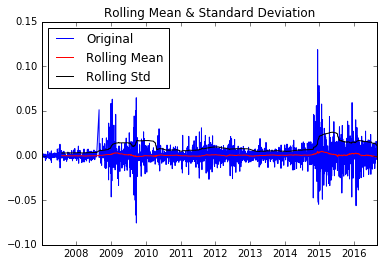

Results of Dickey-Fuller Test:
Test Statistic                -8.558795e+00
p-value                        8.809857e-14
#Lags Used                     2.000000e+01
Number of Observations Used    2.470000e+03
Critical Value (5%)           -2.862711e+00
Critical Value (1%)           -3.433000e+00
Critical Value (10%)          -2.567393e+00
dtype: float64


In [45]:
# Differencing - отличные результаты
ts_log_diff = ts_log - ts_log.shift(periods=1)
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [123]:
index_q= ts_log.index
ts_log = pd.DataFrame(data=ts_log.values, index=pd.to_datetime(ts_log.index), columns=['usd/rub'])


In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

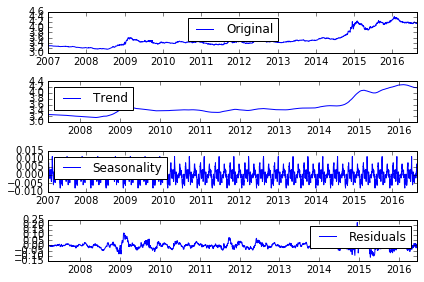

In [141]:
# посмотрим и выявим тренд + сезонность, и что останется от ряда, если всё это вычесть
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq = 101)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

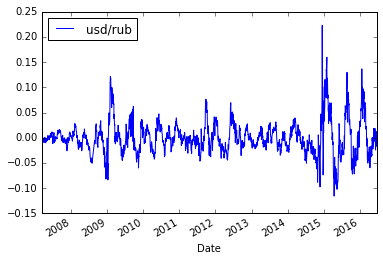

In [145]:
ts_log_decompose.dropna(inplace=True)
ts_log_decompose.plot()

In [146]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

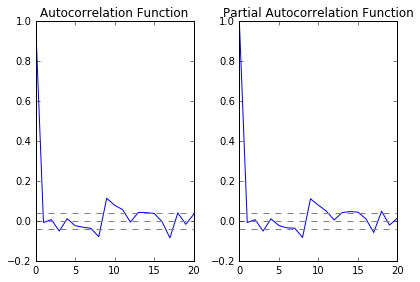

In [178]:
import matplotlib.ticker as ticker
plt.figure(figsize=(15,4))
tick_spacing = 1
fig, ax = plt.subplots(1,1)
#ax.plot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

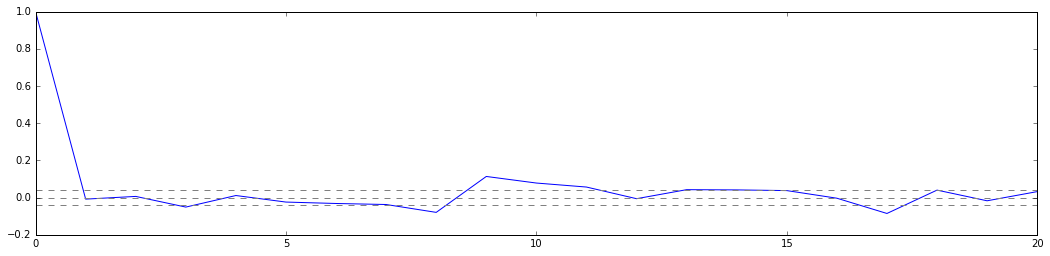

In [182]:
plt.figure(figsize=(50,4))

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.show()

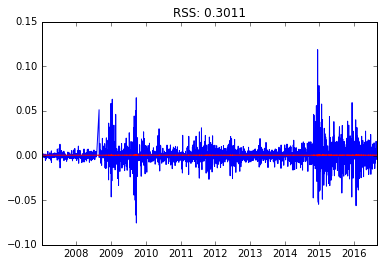

In [185]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

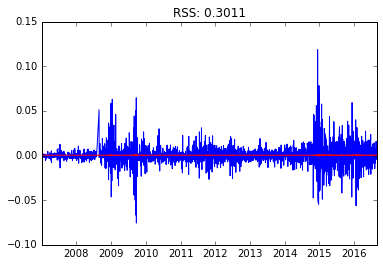

In [186]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

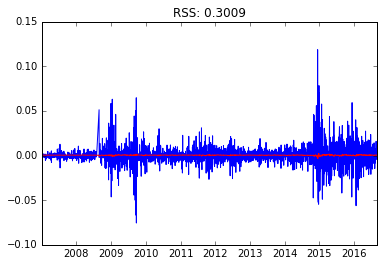

In [192]:
model = ARIMA(ts_log, order=(1, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [193]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Date
2007-01-02    0.000361
2007-01-03    0.000364
2007-01-04    0.000364
2007-01-05    0.000338
2007-01-08    0.000294
dtype: float64


In [194]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Date
2007-01-02    0.000361
2007-01-03    0.000725
2007-01-04    0.001089
2007-01-05    0.001427
2007-01-08    0.001720
dtype: float64


In [195]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2007-01-01         NaN
2007-01-02    0.000361
2007-01-03    0.000725
2007-01-04    0.001089
2007-01-05    0.001427
dtype: float64

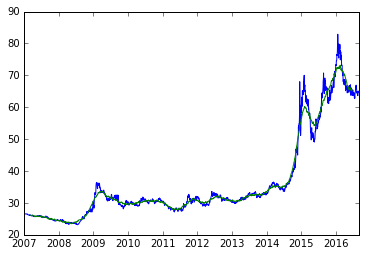

ERROR! Session/line number was not unique in database. History logging moved to new session 268


In [204]:
predictions_ARIMA = np.exp(trend + seasonal)
plt.plot(rub["Adj Close"])
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-rub["Adj Close"])**2)/len(rub["Adj Close"])))